In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_abstract = pd.read_csv('Data/Update/Abstractz.csv').iloc[:,:3:2]
df_abstract

,No.,Abstracts
0,1,Inland water bodies (particularly ponds) emit ...
1,2,Electric vehicles (EVs) can reduce transportat...
2,3,Greenhouse gas (GHG) emissions from soil carbo...
3,4,The increasing greenhouse gas (GHG) emission a...
4,5,Energy efficiency has enormous potential for b...
5,6,Unprecedented urbanization is dramatically alt...
6,7,As China urbanized and its economy grew rapidl...
7,8,Given the importance of the environment around...
8,9,Organic amendment often affects both crop yiel...
9,10,Growing population and limited energy resource...


In [3]:
df_factor = pd.read_csv('Data/Update/FactorsWDI_Indonesia.csv')
df_factor.columns = df_factor.iloc[3]
df_factor = df_factor.iloc[4:]

df_factor.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
4,Indonesia,IDN,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Indonesia,IDN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000e+03,8.000000e+02,1.500000e+02,3.500000e+02,2.800000e+03,4.500000e+03,2.300000e+04,4.600000e+03,2.700000e+04,NaN
6,Indonesia,IDN,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,NaN,NaN,NaN,NaN,NaN,NaN,...,4.319249e+01,4.679803e+01,4.630542e+01,4.482759e+01,4.285714e+01,4.299517e+01,4.299517e+01,4.057971e+01,4.492754e+01,NaN
7,Indonesia,IDN,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,4.083123e+01,4.477008e+01,4.984451e+01,4.948332e+01,5.327123e+01,5.387354e+01,5.470876e+01,2.353857e+01,3.857381e+00,2.920281e+01
8,Indonesia,IDN,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,2.233384e+10,2.291958e+10,2.158904e+10,2.264534e+10,2.466505e+10,3.048954e+10,3.091049e+10,1.436736e+10,1.349990e+10,2.300639e+10


In [4]:
df_indicators = df_factor['Indicator Name']

df_indicators

4          Intentional homicides, male (per 100,000 male)
5       Internally displaced persons, new displacement...
6       Voice and Accountability: Percentile Rank, Low...
7       Travel services (% of commercial service exports)
8                Commercial service exports (current US$)
                              ...                        
1478    Urban land area where elevation is below 5 met...
1479                  Permanent cropland (% of land area)
1480                               Arable land (hectares)
1481    Fertilizer consumption (% of fertilizer produc...
1482             Observed Average Annual Mean-Temperature
Name: Indicator Name, Length: 1479, dtype: object

# New Update

## Abstract Data

,0
0,sub
1,regressive
2,mode
3,cooling
4,factor
...,...
1065,studied
1066,moisture
1067,estimation
1068,shallow


[('emissions', 98), ('ghg', 73), ('energy', 50), ('greenhouse', 33), ('gas', 29), ('soil', 26), ('economic', 24), ('carbon', 21), ('increase', 20), ('emission', 18)]


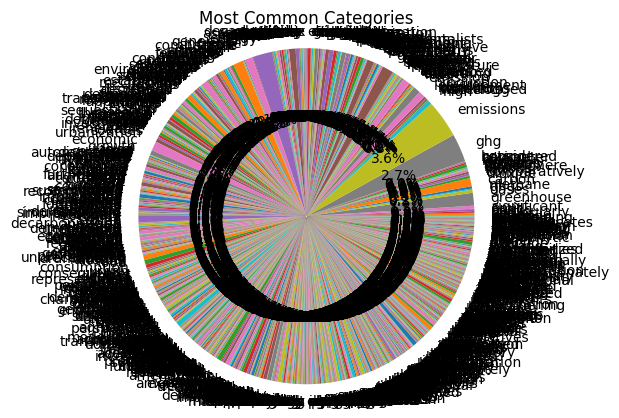

In [14]:
import pandas as pd
import spacy
from collections import Counter

df_abstract = pd.read_csv('Data/Update/Abstractz.csv').iloc[:,:3:2]
nlp = spacy.load('en_core_web_sm')

def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if not token.is_stop and token.is_alpha and token.lemma_ and len(token)>1]
    return keywords

df = df_abstract  

keywords = []

for _, row in df.iterrows():
    sentence = row['Abstracts']
    keyword = extract_keywords(sentence)
    keywords.extend(keyword)

keywords_list = pd.DataFrame(list(set(keywords)))
keywords_list.to_csv('abstracts.txt', sep=',', index=False, header=False)

display(keywords_list)
print(Counter(keywords).most_common(10))

# Extract labels and values from the sorted dictionary
labels = list((Counter(keywords)).keys())
values = list((Counter(keywords)).values())

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title to the chart
plt.title('Most Common Categories')

# Show the chart
plt.show()

In [6]:
test = dict(Counter(keywords))


## Dataset Factors

In [7]:
df_ghg = pd.read_csv('Data/Update/GHG_IndoFactors.csv')
nlp = spacy.load('en_core_web_sm')

def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if not token.is_stop and token.is_alpha and token.lemma_ and len(token)>1]
    return keywords

df2 = df_ghg  

keywords2 = []

for _, row in df2.iterrows():
    sentence = row['Indicator Name']
    keyword = extract_keywords(sentence)
    keywords2.extend(keyword)

keywords_list2 = pd.DataFrame(list(set(keywords2)))
keywords_list2.to_csv('datasetFactors.txt', sep=',', index=False, header=False)


display(keywords_list2)
print(Counter(keywords2).most_common(7))

,0
0,sub
1,waters
2,factor
3,density
4,secure
...,...
711,lowest
712,contribution
713,workers
714,drinking


[('current', 240), ('population', 214), ('total', 137), ('female', 117), ('male', 115), ('ages', 109), ('net', 109)]


## Intersection

In [51]:
list1 = keywords
list2 = keywords2

# Convert lists to sets
set1 = set(list1)
set2 = set(list2)

# Find the intersection
intersection = set1.intersection(set2)

# Convert the intersection back to a list
intersection_list = list(intersection)
intersection_lists = pd.DataFrame(list(set(intersection))).sort_values(0)
output3 = ', '.join(intersection_lists.to_numpy().flatten())

with open('intersects.txt', 'w') as file:
    file.write(output3)

# Print the intersection
print(sorted(intersection_list), '\nLength:', len(intersection_list))

['abroad', 'account', 'agencies', 'agricultural', 'agriculture', 'air', 'alternative', 'applied', 'area', 'areas', 'asia', 'assessment', 'available', 'average', 'benefit', 'benefits', 'budget', 'capacity', 'capita', 'carbon', 'carried', 'case', 'caused', 'change', 'changes', 'clean', 'construction', 'consumer', 'consumption', 'contribution', 'contributions', 'control', 'conversion', 'cost', 'country', 'credit', 'crop', 'current', 'data', 'day', 'depth', 'design', 'development', 'dioxide', 'direct', 'economies', 'economy', 'education', 'electric', 'electricity', 'emission', 'emissions', 'energy', 'equivalent', 'estimate', 'etc', 'exchange', 'exports', 'extent', 'factor', 'fertility', 'fertilizer', 'food', 'forms', 'freshwater', 'fuel', 'gains', 'gap', 'gas', 'gdp', 'general', 'global', 'government', 'greenhouse', 'growth', 'health', 'high', 'highest', 'households', 'imports', 'including', 'income', 'index', 'indicators', 'industry', 'intensity', 'internal', 'international', 'investment'

In [64]:
abstract_count = Counter(keywords)

result_dict = {key: abstract_count[key] for key in intersection_list if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))

print(sorted_result)

{'abroad': 1, 'account': 1, 'agencies': 1, 'air': 1, 'alternative': 1, 'asia': 1, 'assessment': 1, 'average': 1, 'benefit': 1, 'benefits': 1, 'budget': 1, 'capita': 1, 'carried': 1, 'case': 1, 'construction': 1, 'consumer': 1, 'contribution': 1, 'contributions': 1, 'day': 1, 'depth': 1, 'design': 1, 'direct': 1, 'equivalent': 1, 'etc': 1, 'exchange': 1, 'exports': 1, 'fertility': 1, 'forms': 1, 'freshwater': 1, 'gains': 1, 'gap': 1, 'gdp': 1, 'general': 1, 'government': 1, 'internal': 1, 'largest': 1, 'law': 1, 'linked': 1, 'marine': 1, 'mean': 1, 'nation': 1, 'net': 1, 'non': 1, 'number': 1, 'oil': 1, 'old': 1, 'original': 1, 'overall': 1, 'power': 1, 'productivity': 1, 'property': 1, 'rail': 1, 'received': 1, 'residents': 1, 'road': 1, 'scale': 1, 'series': 1, 'south': 1, 'specific': 1, 'stability': 1, 'sub': 1, 'switzerland': 1, 'technical': 1, 'technologies': 1, 'technology': 1, 'terms': 1, 'trade': 1, 'unit': 1, 'value': 1, 'varies': 1, 'year': 1, 'years': 1, 'young': 1, 'areas': 

In [65]:
0.05*len(sorted_result)

9.15

In [66]:
import math
threshold = math.floor(0.05*len(sorted_result))

# Use dictionary comprehension to filter the data
selected_keywords = {key: value for key, value in sorted_result.items() if value >= threshold}
print(selected_keywords)
print(len(selected_keywords))

{'high': 9, 'long': 9, 'related': 9, 'total': 9, 'urban': 9, 'population': 10, 'yield': 10, 'intensity': 11, 'land': 11, 'consumption': 12, 'growth': 12, 'food': 13, 'production': 17, 'use': 17, 'emission': 18, 'carbon': 21, 'gas': 29, 'greenhouse': 33, 'energy': 50, 'emissions': 98}
20


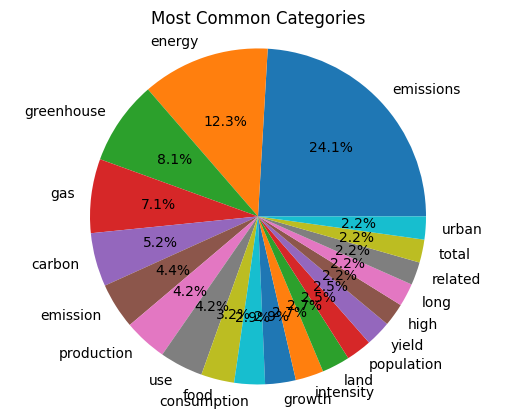

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data dictionary
data = selected_keywords

# Sort the dictionary by values in descending order
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Extract labels and values from the sorted dictionary
labels = list(data.keys())
values = list(data.values())

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title to the chart
plt.title('Most Common Categories')

# Show the chart
plt.show()

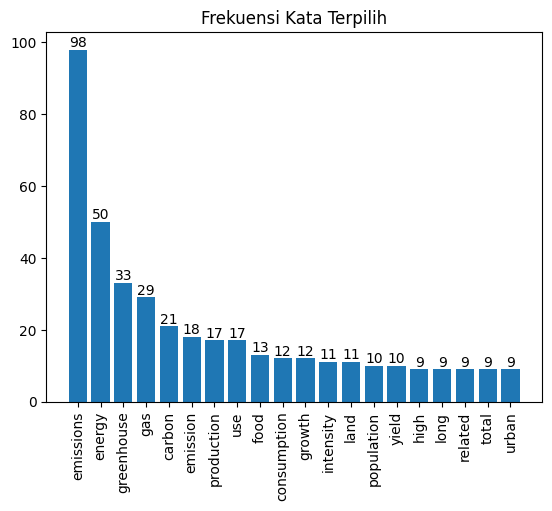

In [68]:
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Extract labels and values from the sorted dictionary
labels = list(data.keys())
values = list(data.values())

# Create a bar chart
plt.bar(labels, values)

# Add labels to the bars
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

plt.xticks(rotation='vertical')
# Add a title to the chart
plt.title('Frekuensi Kata Terpilih')

# Show the chart
plt.show()

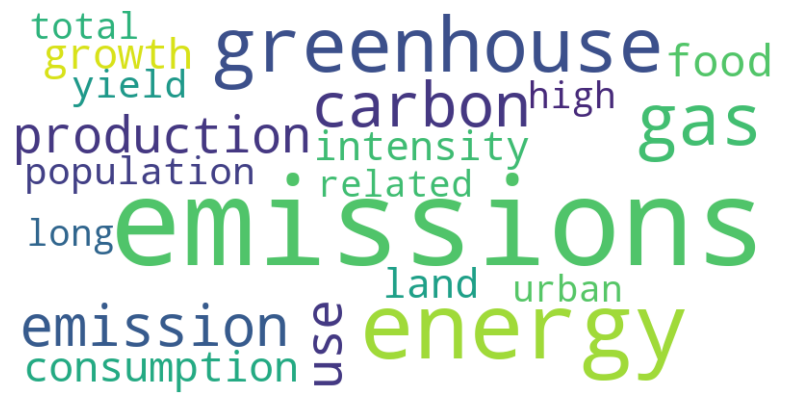

In [69]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
# List of keys to be deleted
keys_to_delete = ['use', 'yield', 'high', 'long', 'related', 'total', 'greenhouse', 'emissions', 'emission']

# Delete elements with the specified keys
for key in keys_to_delete:
    del data[key]

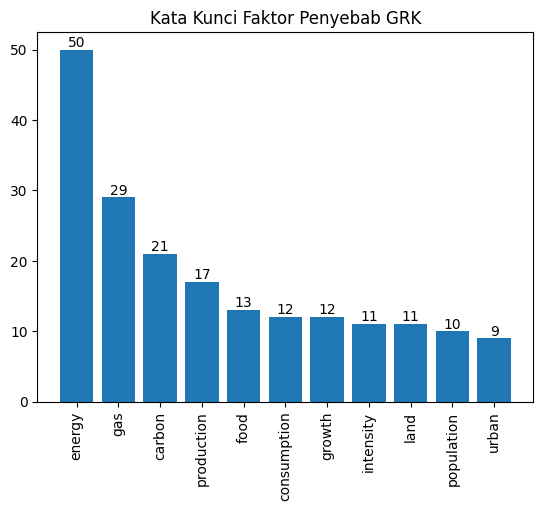

In [71]:
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Extract labels and values from the sorted dictionary
labels = list(data.keys())
values = list(data.values())

# Create a bar chart
plt.bar(labels, values)

# Add labels to the bars
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

plt.xticks(rotation='vertical')
# Add a title to the chart
plt.title('Kata Kunci Faktor Penyebab GRK')

# Show the chart
plt.show()

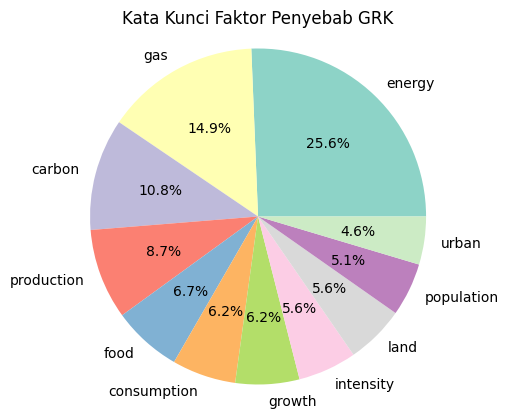

In [87]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

labels = list(data.keys())
values = list(data.values())
cmap = plt.get_cmap('Set3')

plt.pie(values, labels=labels, colors=cmap.colors, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Kata Kunci Faktor Penyebab GRK')

plt.show()

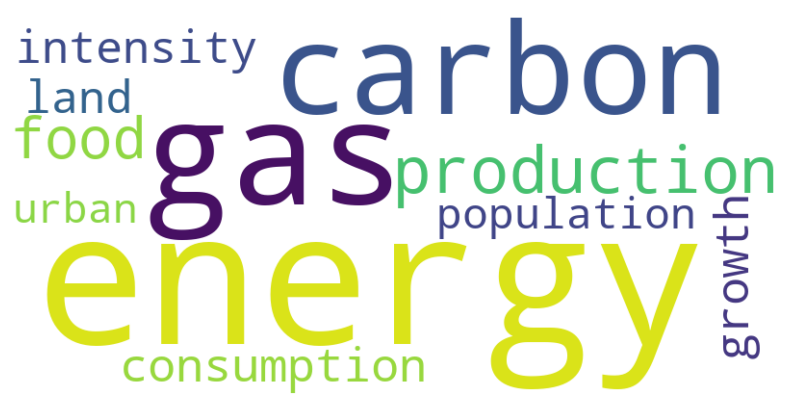

In [73]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Exceeds

In [97]:
import numpy as np

# Define the objective function to maximize (Example: F(x) = x1 + 2*x2)
def objective_function(x):
    return x[0] + 2 * x[1]

# Define the Genetic Algorithm function
def genetic_algorithm(population_size, num_variables, generations, mutation_rate):
    # Initialize the population with random values between 0 and 1 (normalized)
    population = np.random.rand(population_size, num_variables)

    for generation in range(generations):
        # Evaluate the fitness of each individual in the population
        fitness = np.array([objective_function(individual) for individual in population])

        # Select the fittest individuals for reproduction (tournament selection, for example)
        selected_indices = np.argsort(fitness)[-int(population_size * 0.5):]

        # Create a new population using crossover and mutation
        new_population = np.empty_like(population)
        for i in range(population_size):
            parent1 = population[np.random.choice(selected_indices)]
            parent2 = population[np.random.choice(selected_indices)]
            child = (parent1 + parent2) / 2  # Crossover
            child = mutate(child, mutation_rate)  # Mutation
            new_population[i] = child

        population = new_population

    # Find the best individual in the final population
    best_individual = population[np.argmax(fitness)]

    return best_individual

# Define the mutation function (Example: Gaussian Mutation)
def mutate(child, mutation_rate):
    mutation = np.random.normal(0, mutation_rate, child.shape)
    child += mutation
    return np.clip(child, 0, 1)  # Ensure values are within the range [0, 1]

if __name__ == "__main__":
    population_size = 100
    num_variables = 2
    generations = 100
    mutation_rate = 0.1

    best_solution = genetic_algorithm(population_size, num_variables, generations, mutation_rate)
    max_fitness = objective_function(best_solution)

    print("Best Solution:", best_solution)
    print("Maximized Fitness:", max_fitness)

Best Solution: [0.83497883 1.        ]
Maximized Fitness: 2.8349788288962543


In [11]:
# import pandas as pd
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def extract_keywords(sentence):
#     doc = nlp(sentence)
#     keywords = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
#     return keywords

# df = df_abstract  
# df2 = df_factor

# keywords_array = []
# keywords_array2 = []

# for _, row in df.iterrows():
#     sentence = row['Abstracts']
#     keywords = extract_keywords(sentence)
#     keywords_array.extend(keywords)

# for _, rows in df2.iterrows():
#     sentence2 = rows['Indicator Name']
#     keywords2 = extract_keywords(sentence2)
#     keywords_array2.extend(keywords2)

# keywords_list = pd.DataFrame(list(set(keywords_array)))
# indicators_list = pd.DataFrame(list(set(keywords_array2)))

# display(keywords_list)
# display(indicators_list)

In [12]:
# intersection_values = pd.Series(list(set(keywords_list[0]).intersection(indicators_list[0])))
# intersection_str = ', '.join(map(str, intersection_values))

# # Write the intersection values to a text file
# with open('keyword.txt', 'w') as file:
#     file.write(intersection_str)
# # Print the intersection values
# # print(str(intersection_values))
# set(keywords_list[0])